## **Download Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/UDEMY

/content/drive/MyDrive/UDEMY


## **Import Libraries**

In [ ]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)

# **Load Data**

In [ ]:
##################### X data (1096, 715, 102) Hyperspectral satellite (1096*715, 102)
data = loadmat('Pavia.mat')['pavia']

##################### Y data (labels)
gt = loadmat('Pavia_gt.mat')['pavia_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands {data.shape[-1]}')

Data Shape: (1096, 715)
Number of Bands 102


In [ ]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [ ]:
df.head()


band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0    854    601    350    266    138    118    178    194    257     269  ...   
1    527    642    575    294    123    168    207    154    209     299  ...   
2    374    322    179     87    169    268    360    339    286     309  ...   
3    706    520    560    572    425    243    271    272    258     276  ...   
4   1120   1027    592    414    407    463    417    365    332     334  ...   

   band94  band95  band96  band97  band98  band99  band100  band101  band102  \
0    3759    3773    3779    3752    3690    3671     3664     3636     3643   
1    3873    3902    3921    3861    3854    3882     3834     3725     3768   
2    4443    4472    4428    4353    4306    4284     4318     4311     4321   
3    3972    4006    4032    3975    3946    3954     3944     3936     3939   
4    4502    4485    4479    4445    4364    4290     4268     4235     4272   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 103 columns]

In [ ]:

print(1096*715), df.shape


783640


(None, (783640, 103))

# **Data Visualization**

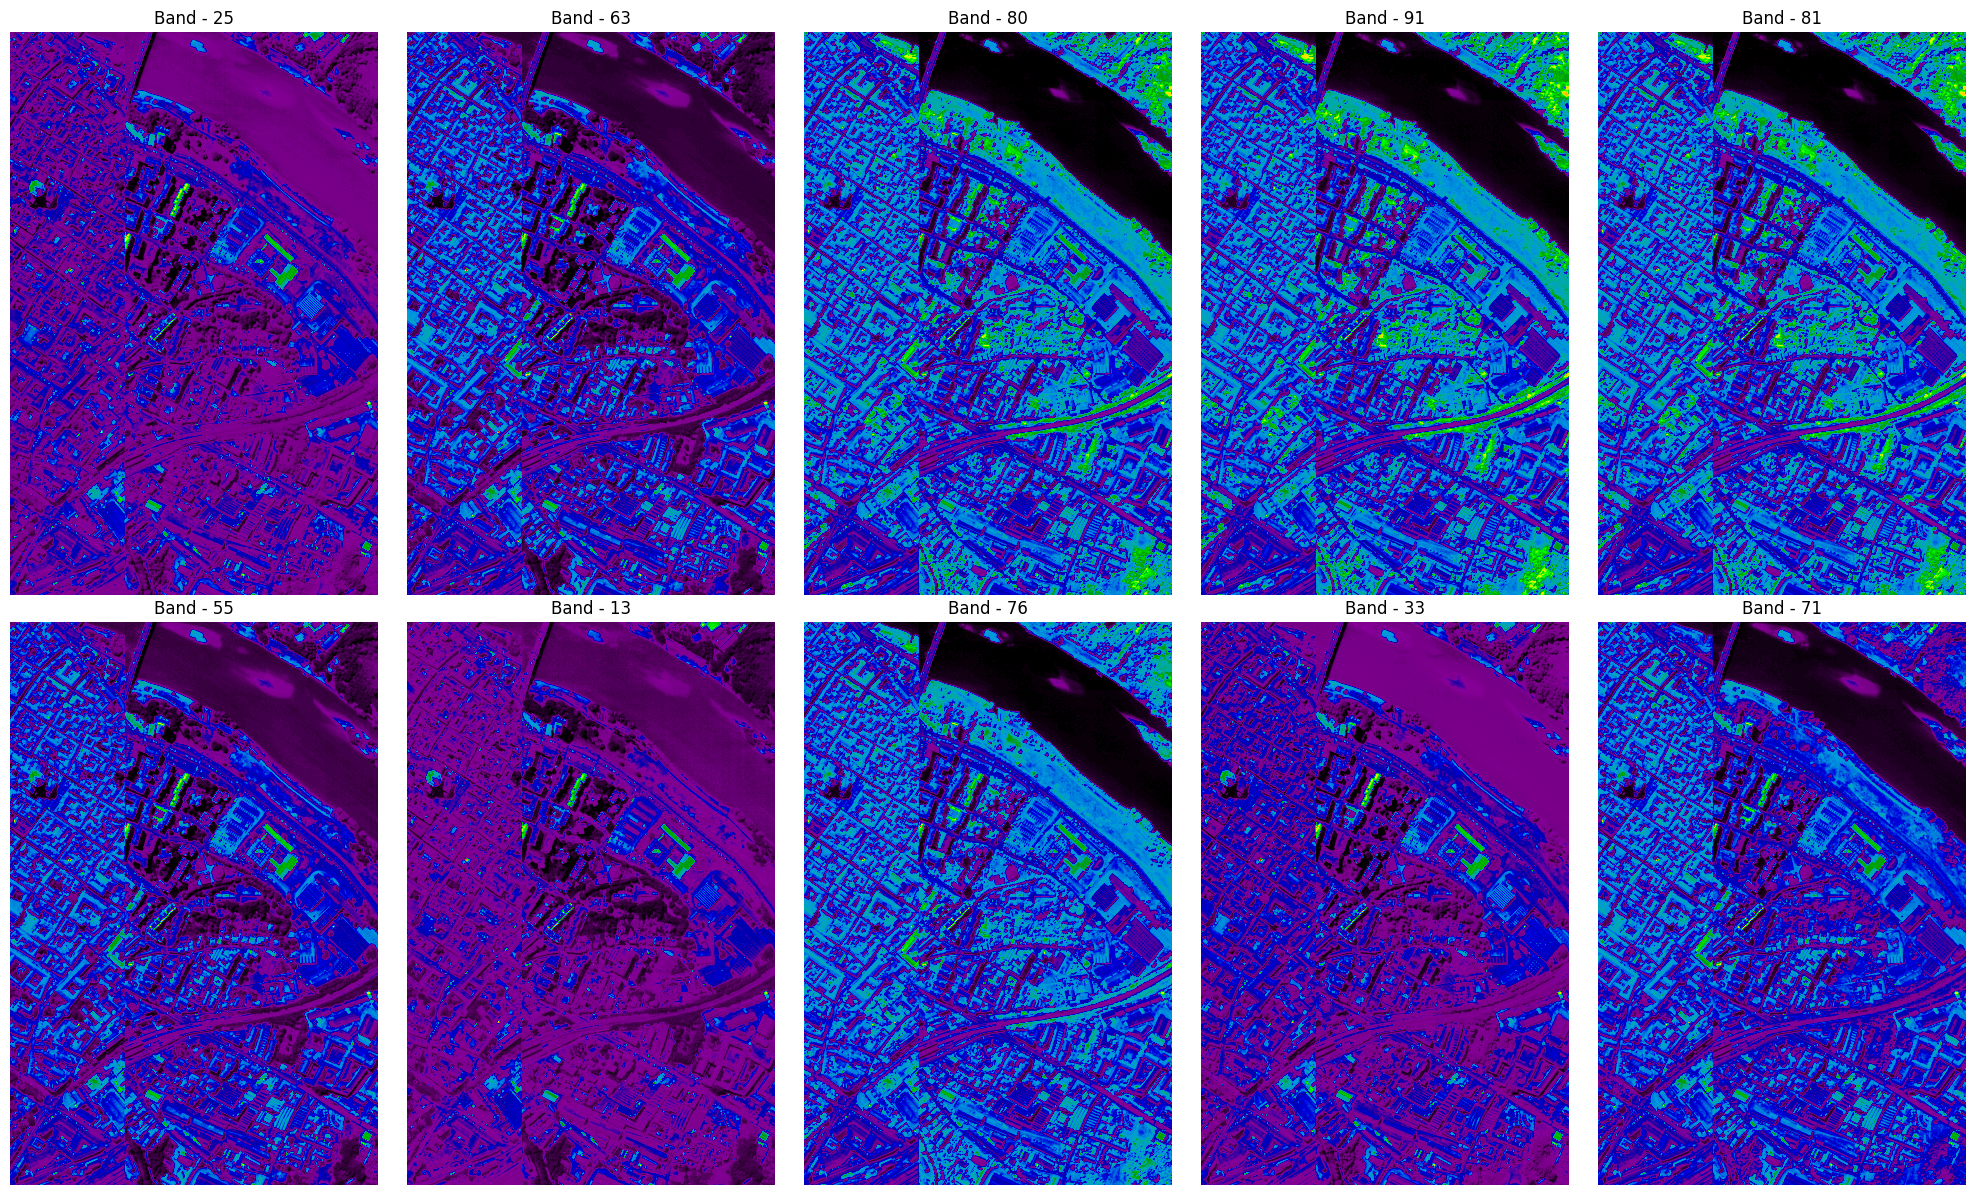

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()

# **RGB Composite Image**

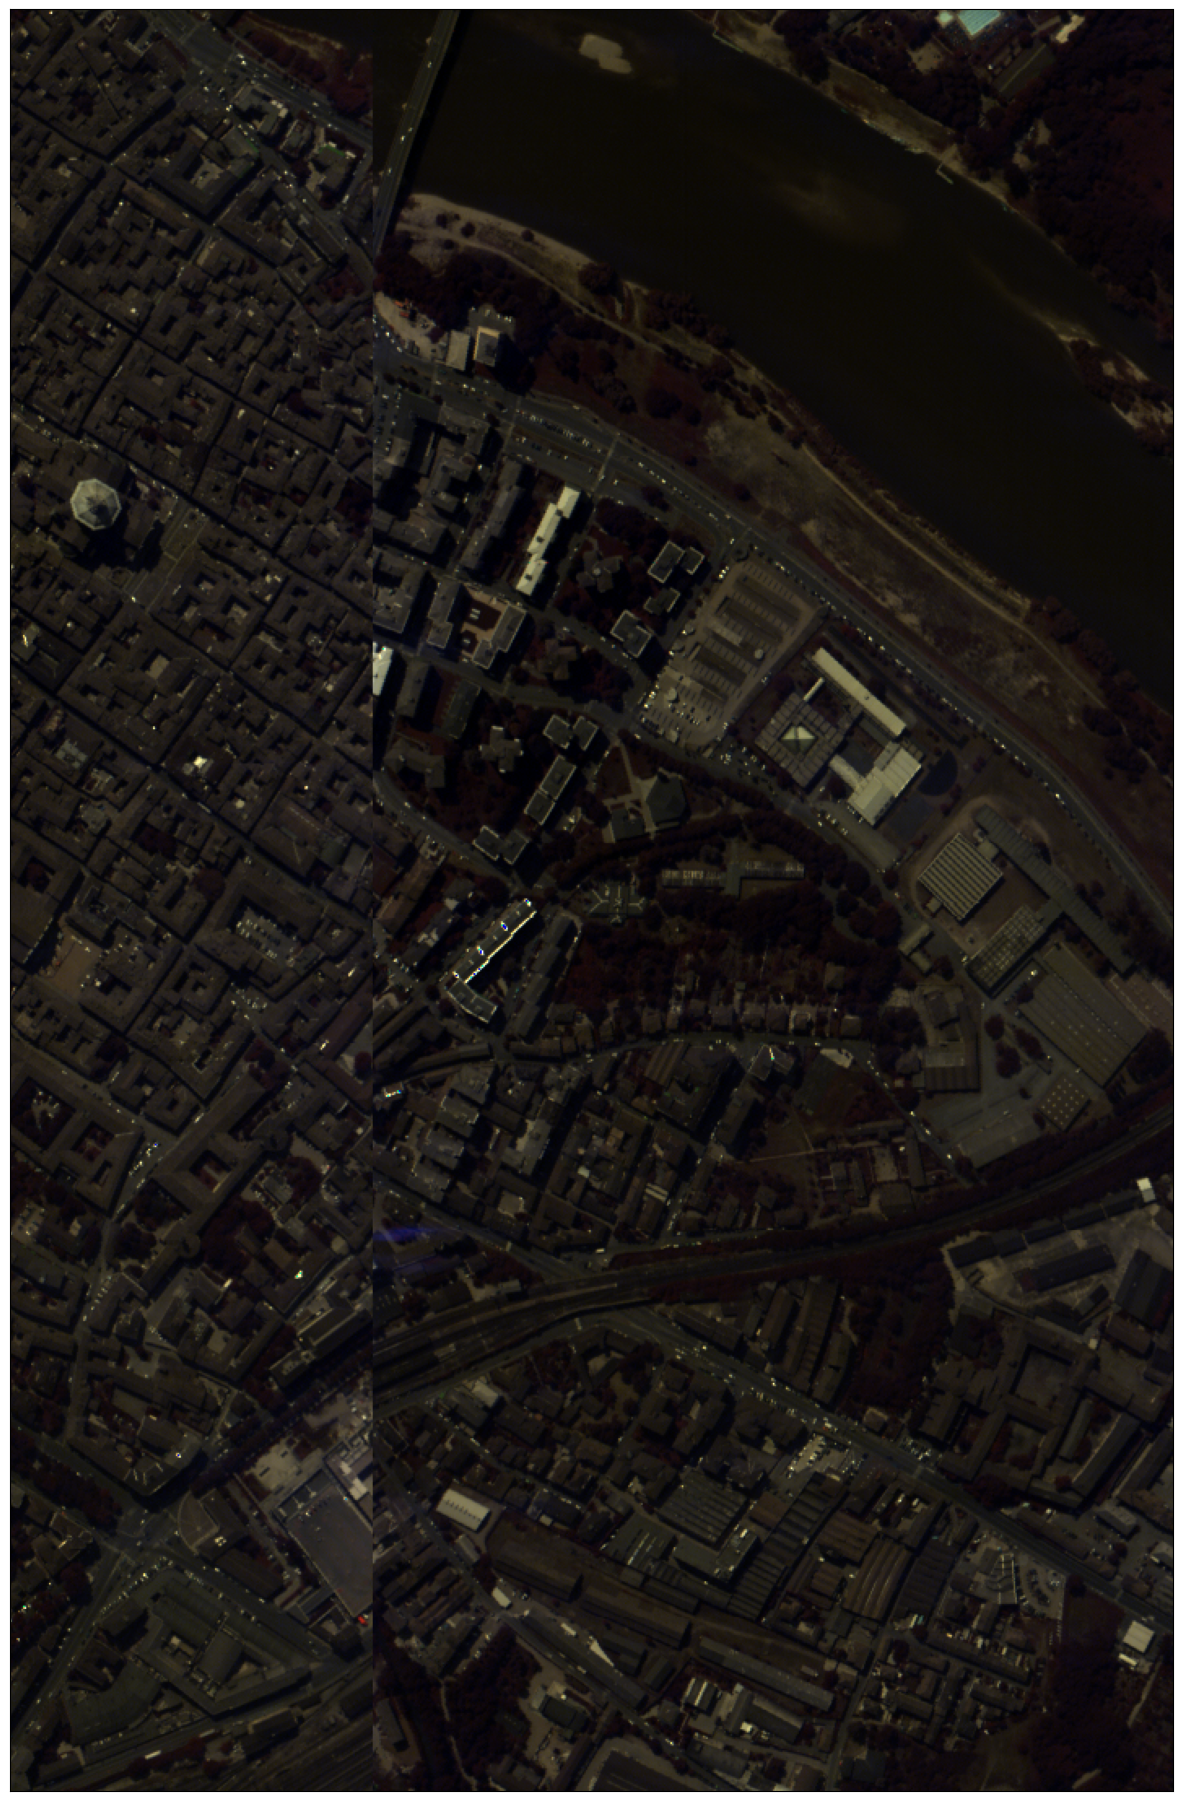

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (29, 19, 2), figsize=(15, 25))

plt.show

# **GroundTruth Visualizaation**

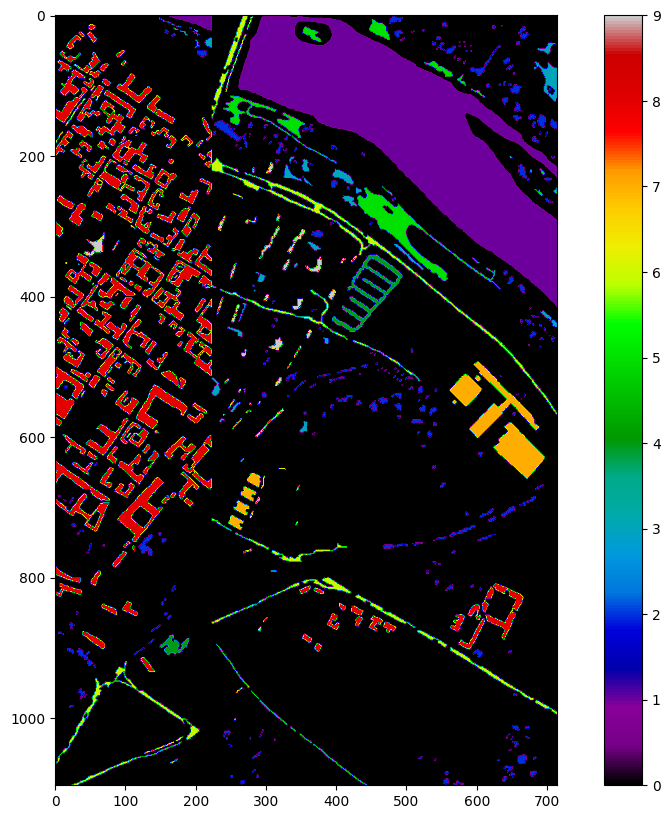

In [ ]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('on')
  plt.show()

plot_data(gt)

# **Scaling Data**

In [ ]:
t_df = df[df['class']!=0]

ind = ['band'+str(i) for i in range(1, t_df.shape[-1])]

X = t_df.loc[:, ind]
X_scaled=X.to_numpy()
y = to_categorical(t_df.loc[:, 'class'])

##### X_normalized= (X - np.min(X))/(np.max(X)- np.min(X))  [0 1]

X_scaled = minmax_scale(X,feature_range=(0, 1), axis = 0);
#X_scaled=(X_scaled+11)/(9300)
X_scaled.shape, y.shape

((148152, 102), (148152, 10))

In [ ]:
np.min(X_scaled), np.max(X_scaled)

(0.0, 1.0)

In [ ]:
X_scaled.shape

(148152, 102)

In [ ]:
np.min(X_scaled), np.max(X_scaled)

(0.0, 1.0)

# **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y, 
                                                    test_size=0.7)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}") 

X_train: (44445, 102)
y_train: (44445, 10)
X_test: (103707, 102)
y_test: (103707, 10)


In [ ]:
X.shape

(148152, 102)

# **Build CNN**

In [ ]:
ip_shape = X_train[1].shape

n_outputs = y_train.shape[1]

X_train[1].ravel().shape

(102,)

In [ ]:
ip_shape

(102,)

In [ ]:
X_train = X_train.reshape(-1, 102, 1)
X_test = X_test.reshape(-1, 102, 1)

In [ ]:
X_train.shape, 

((44445, 102, 1),)

In [ ]:
model = Sequential(name = 'Salinas_CNN')

model.add(Conv1D(filters = 32, kernel_size = 1, activation ='relu', input_shape =(ip_shape[0],1), name = 'Layer1'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer2'))
model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer1'))
model.add(Dropout(0.4, name = 'Dropout1'))

model.add(Conv1D(filters = 64, kernel_size = 1, activation ='relu', input_shape =(ip_shape[0],1), name = 'Layer3'))
model.add(Conv1D(filters = 128, kernel_size = 3, activation ='relu' , name = 'Layer4'))
model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer2'))
model.add(Dropout(0.4, name = 'Dropout2'))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(200, activation='relu', name = 'DenseLayer1'))
model.add(Dense(50, activation='relu', name = 'DenseLayer2'))

model.add(Dense(n_outputs, activation='softmax', name = 'OutputLayer'))


model.summary()

Model: "Salinas_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv1D)             (None, 102, 32)           64        
                                                                 
 Layer2 (Conv1D)             (None, 100, 64)           6208      
                                                                 
 MaxPooling_Layer1 (MaxPooli  (None, 50, 64)           0         
 ng1D)                                                           
                                                                 
 Dropout1 (Dropout)          (None, 50, 64)            0         
                                                                 
 Layer3 (Conv1D)             (None, 50, 64)            4160      
                                                                 
 Layer4 (Conv1D)             (None, 48, 128)           24704     
                                                       